In [1]:
from PIL import Image
import numpy as np
import torch
from torch import nn
from torchvision import transforms

In [2]:
data_address = "./../data/images_original/"
im = Image.open(f"{data_address}blues/blues00000.png")

In [3]:
print(im.format, im.size, im.mode)

PNG (432, 288) RGBA


In [4]:
im = Image.open(f"{data_address}classical/classical00020.png")
print(im.format, im.size, im.mode)

PNG (432, 288) RGBA


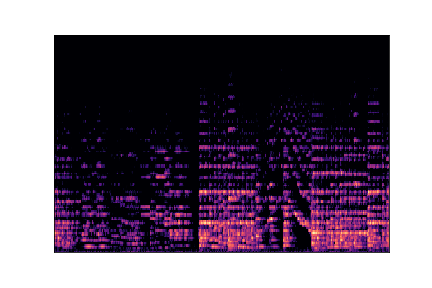

In [5]:
display(im)

In [22]:
numpyArr = np.asarray(im)
print(numpyArr.shape)


(288, 432, 4)


In [23]:
torchArr = torch.tensor(numpyArr)

In [24]:
print(torchArr[35:253, 54:390, :3].shape)

torch.Size([218, 336, 3])


In [25]:
torchArr = torchArr[35:253, 54:390, :3]

print(torchArr)
# print(torch.sum(torchArr, dim = 1))

tensor([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [ 19,  19,  19]],

        [[  0,   0,   0],
         [  0,   0,   4],
         [  0,   0,   4],
         ...,
         [  0,   0,   4],
         [  0,   0,   4],
         [ 51,  51,  51]],

        [[  0,   0,   0],
         [  0,   0,   4],
         [  0,   0,   4],
         ...,
         [  0,   0,   4],
         [  0,   0,   4],
         [ 51,  51,  51]],

        ...,

        [[  6,   3,  15],
         [ 28,  16,  68],
         [  0,   0,   4],
         ...,
         [ 36,  18,  83],
         [ 90,  22, 126],
         [ 51,  51,  51]],

        [[  3,   2,   9],
         [ 51,  16, 103],
         [ 20,  14,  54],
         ...,
         [ 24,  15,  61],
         [ 93,  23, 127],
         [ 51,  51,  51]],

        [[ 19,  19,  19],
         [ 51,  51,  51],
         [ 51,  51,  51],
         ...,
         [ 51,  51,  51],
        

In [38]:
print(torchArr.float().mean(dim = 1))

tensor([[5.6548e-02, 5.6548e-02, 5.6548e-02],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4.1280e+00],
        [1.5179e-01, 1.5179e-01, 4

In [9]:
randArr = torch.rand(4)
print(randArr)
#torchArr = torchArr.flatten(start_dim = 0, end_dim = 1)
print(torchArr.shape)
print(randArr.shape)

tensor([0.8030, 0.5383, 0.7279, 0.7846])
torch.Size([288, 432, 4])
torch.Size([4])


In [17]:
# newOnes = torch.ones(288, 432, 1)
# concatTorchArr = torch.cat((torchArr, newOnes), 2) 
# print(concatTorchArr.shape)
multResult = torchArr.float().matmul(randArr.T)
print(multResult.shape)
# print(list(concatTorchArr[0][0]))
print(multResult[0][0])

torch.Size([288, 432])
tensor(727.7065)


In [18]:
bias = torch.rand(1)
print(bias)
multResult = multResult + bias
print(multResult.shape)
print(multResult[0][0])

tensor([0.8439])
torch.Size([288, 432])
tensor(728.5504)


In [19]:
print(multResult)

tensor([[728.5504, 728.5504, 728.5504,  ..., 728.5504, 728.5504, 728.5504],
        [728.5504, 728.5504, 728.5504,  ..., 728.5504, 728.5504, 728.5504],
        [728.5504, 728.5504, 728.5504,  ..., 728.5504, 728.5504, 728.5504],
        ...,
        [728.5504, 728.5504, 728.5504,  ..., 728.5504, 728.5504, 728.5504],
        [728.5504, 728.5504, 728.5504,  ..., 728.5504, 728.5504, 728.5504],
        [728.5504, 728.5504, 728.5504,  ..., 728.5504, 728.5504, 728.5504]])


In [20]:
print(multResult.shape)

torch.Size([288, 432])


In [21]:

# testRow140 = multResult[140]
# # print(testRow140)
reshapedResult = multResult.reshape((288, 24, 18))
print(reshapedResult.shape)
# print(sum(testRow140 != reshapedResult[140].flatten()))

torch.Size([288, 24, 18])


In [84]:
summedResult = reshapedResult.sum(dim = 2)
print(summedResult.shape)

torch.Size([288, 24])


In [85]:
print(summedResult)

tensor([[7318.3057, 7318.3057, 7318.3057,  ..., 7318.3057, 7318.3057,
         7318.3057],
        [7318.3057, 7318.3057, 7318.3057,  ..., 7318.3057, 7318.3057,
         7318.3057],
        [7318.3057, 7318.3057, 7318.3057,  ..., 7318.3057, 7318.3057,
         7318.3057],
        ...,
        [7318.3057, 7318.3057, 7318.3057,  ..., 7318.3057, 7318.3057,
         7318.3057],
        [7318.3057, 7318.3057, 7318.3057,  ..., 7318.3057, 7318.3057,
         7318.3057],
        [7318.3057, 7318.3057, 7318.3057,  ..., 7318.3057, 7318.3057,
         7318.3057]])
